# <center >CRIMINAL ACTIVITIES</center >

### <span style='font-family:Calibri'>    I invite you to look at the result of my little research, how the number of criminals is distributed by ethnic group in England and Wales. Also see how the number of arrests changed depending on the number of police officers. This is my first work, so please treat with understanding. All data is taken from the website: https://www.ons.gov.uk/ </span>

### <span style='font-family:Calibri'> Psychologist  Abraham Maslow compiled a hierarchy of human needs (you can take a look at it below). And although this hierarchy is controversial, but looking at it, is difficult to disagree with this model. You can read about this hierarchy on wikipedia.
### <span style='font-family:Calibri'> Why in this great coutry such a high crime rate. In a country with a lot of benefits, in which the state provides the necessary minimum for a people's life? </span>
<img src="https://www.simplypsychology.org/maslow-pyramid.jpg" alt="Drawing" style="width: 600px;"/></span>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loc_arrests = ()
forces = ()
police = pd.read_csv('Number_police.csv')
arrests = pd.read_csv ('arrests.csv', thousands = ',')
arrests_df = pd.DataFrame (arrests)
arrests_df = arrests_df.rename ({'Population by ethnicity, gender, and PFA (based on 2011 Census)' : 'Population'}, axis=1)
arrests_df = arrests_df.rename ({'Number of arrests' : 'Number_arr'}, axis=1)
arrests_df['Population'] = arrests_df['Population'].replace('N/A for individual age groups', 0)
arrests_df['Population'] = arrests_df['Population'].str.replace(',', '')
arrests_df = arrests_df.replace({'Number_arr':{'-':0}})
arrests_df['Number_arr'] = arrests_df['Number_arr'].str.replace(',', '')
arrests_df[['Number_arr', 'Population']] = arrests_df[['Number_arr', 'Population']].fillna(0).astype('int')
arrests_df.head(5)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number_arr,Population,"Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2018/19,Financial year,All,All,All,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,60208,0,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
1,Number of arrests,2018/19,Financial year,All,All,Female,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,9290,0,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
2,Number of arrests,2018/19,Financial year,All,All,Male,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,50918,0,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
3,Number of arrests,2018/19,Financial year,Any other asian,ONS 2001 16+1,Female,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,75,0,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
4,Number of arrests,2018/19,Financial year,Any other asian,ONS 2001 16+1,Male,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,941,0,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...


In [2]:
svod = arrests_df.loc[(arrests_df['Age_Group'] == 'All') & (arrests_df['Gender'] == 'All') & (arrests_df['Geography'] == 'All'), \
                   ['Time', 'Ethnicity', 'Number_arr', 'Population']] # Filtering groups
bars = svod.loc[(svod['Ethnicity'] == 'All'), ['Time', 'Number_arr']]
bars = bars.sort_values(by=['Time'])
corel_= bars[['Number_arr']]
corel_['pol'] = police['Total'].values
corel_

,Number_arr,pol
100206,1021356,241307
81984,941692,237393
63764,879570,231366
45540,762419,226193
27326,675461,233766
9110,671126,234840


In [3]:
etnos_bar = svod[['Time', 'Ethnicity', 'Number_arr', 'Population']]
etnos_bar = svod.loc[(svod['Ethnicity'] != 'All'), ['Time', 'Ethnicity', 'Number_arr', 'Population']]

etnos_bar['per'] =  etnos_bar['Number_arr'] * 1000 / etnos_bar['Population']
etnos_bar = etnos_bar.replace([np.inf, -np.inf], np.nan).fillna(0).round({'per': 0}).astype({'per': 'int'})
etnos_bar = etnos_bar.sort_values(by=['Time', 'Number_arr'])
etnos_bar

,Time,Ethnicity,Number_arr,Population,per
100241,2013/14,Chinese,1888,393141,5
100250,2013/14,Mixed White and Asian,2906,341727,9
100253,2013/14,Mixed White and Black African,3647,165974,22
100220,2013/14,Any other mixed/multiple ethnic background,8521,289984,29
100229,2013/14,Bangladeshi,9527,447201,21
...,...,...,...,...,...
9125,2018/19,Any other white background,45182,2514061,18
9134,2018/19,Black,60116,1859513,32
9167,2018/19,Unreported,82838,0,0
9173,2018/19,White British,400914,43853160,9


In [4]:
etnos_svod = pd.DataFrame(etnos_bar[['Number_arr', 'per']].groupby(etnos_bar['Ethnicity']).sum())
etnos_svod = etnos_svod.sort_values(by=['Number_arr'], ascending=False)
etnos_svod = etnos_svod.reset_index()
k = etnos_svod
k = k.astype({'Number_arr': 'str'})
k = k.astype({'per': 'str'})
etnos_svod['nmr'] = etnos_svod['Ethnicity'] + ':   ' + k['Number_arr'] #concatenation
etnos_svod['pmr'] = etnos_svod['Ethnicity'] + ':   ' + k['per']

[(200000.0, 245000.0),
 Text(0, 0.5, 'Number of police officers'),
 Text(0.5, 0, 'Years')]

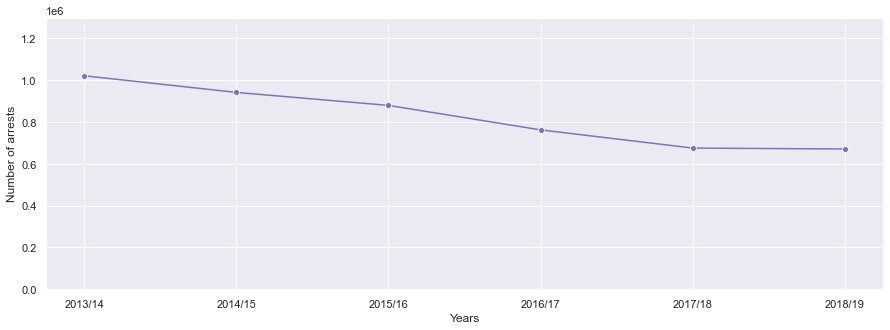

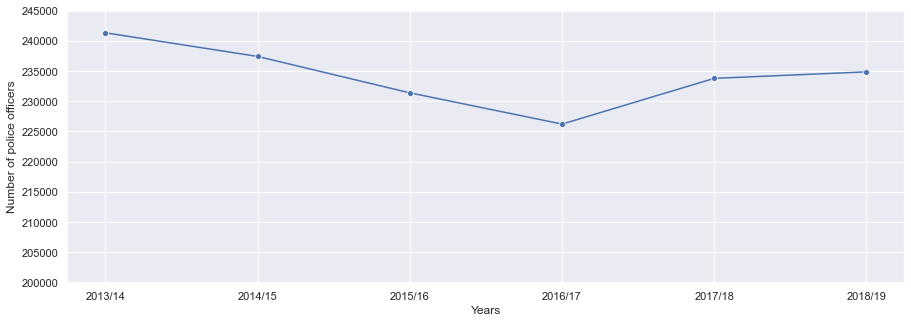

In [5]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="Time", y="Number_arr", data=bars,
            label="", marker='o', color="m")
ax.set(ylim=(0, 1300000), ylabel="Number of arrests",
       xlabel="Years")
police = police.sort_values(by=['Time'], ascending=True)
f, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x="Time", y="Total", data = police,
            label="", marker='o', color="b")
ax.set(ylim=(200000, 245000), ylabel="Number of police officers",
       xlabel="Years")

#### As you can see, until 2016 relation between the decrease in the number of police officers and the number of arrests

In [6]:
corel_[['Number_arr','pol']].corr(method='pearson') # correlation coefficient

,Number_arr,pol
Number_arr,1.000000,0.555707
pol,0.555707,1.000000


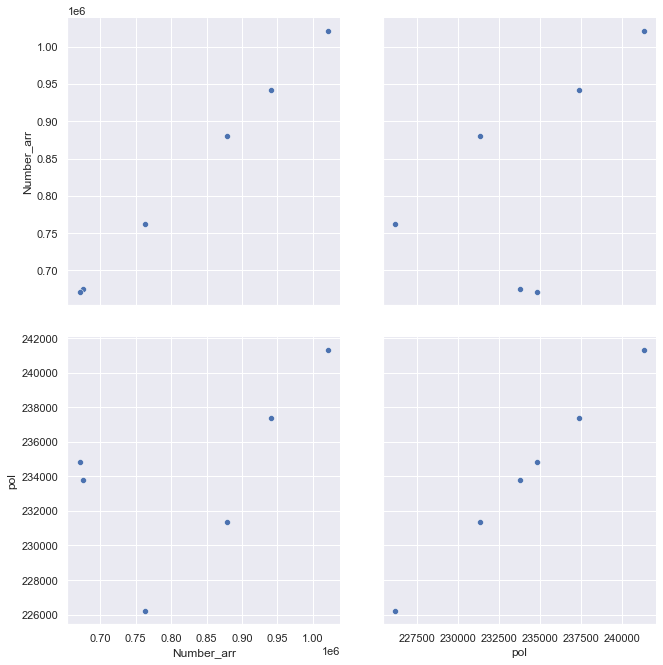

In [7]:
g = sns.PairGrid(corel_)
g.map(sns.scatterplot)
g.fig.set_size_inches(10,10)

#Correlation visualization

Text(0.5, 1.0, 'Total number of arrests by ethnic group')

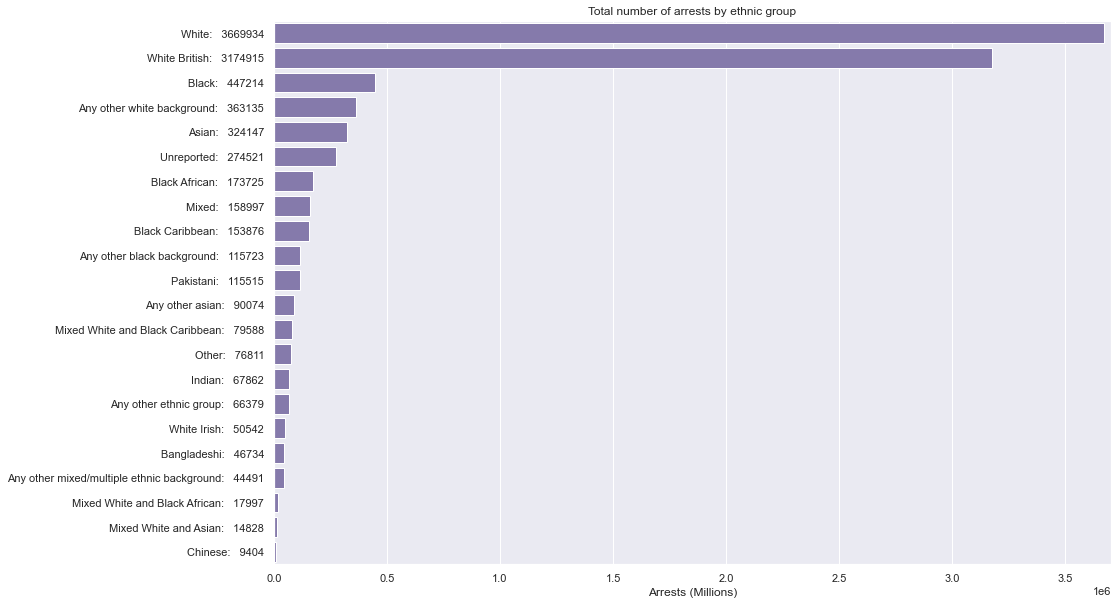

In [8]:
etnos_svod = etnos_svod.sort_values(by=['Number_arr'], ascending=False)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Number_arr", y="nmr", data=etnos_svod,
            label="", color="m")
ax.set(xlim=(0, 3700000), ylabel="",
       xlabel="Arrests (Millions)")
ax.set_title('Total number of arrests by ethnic group')

Text(0.5, 1.0, 'Arrests per thousand people of the ethnic group')

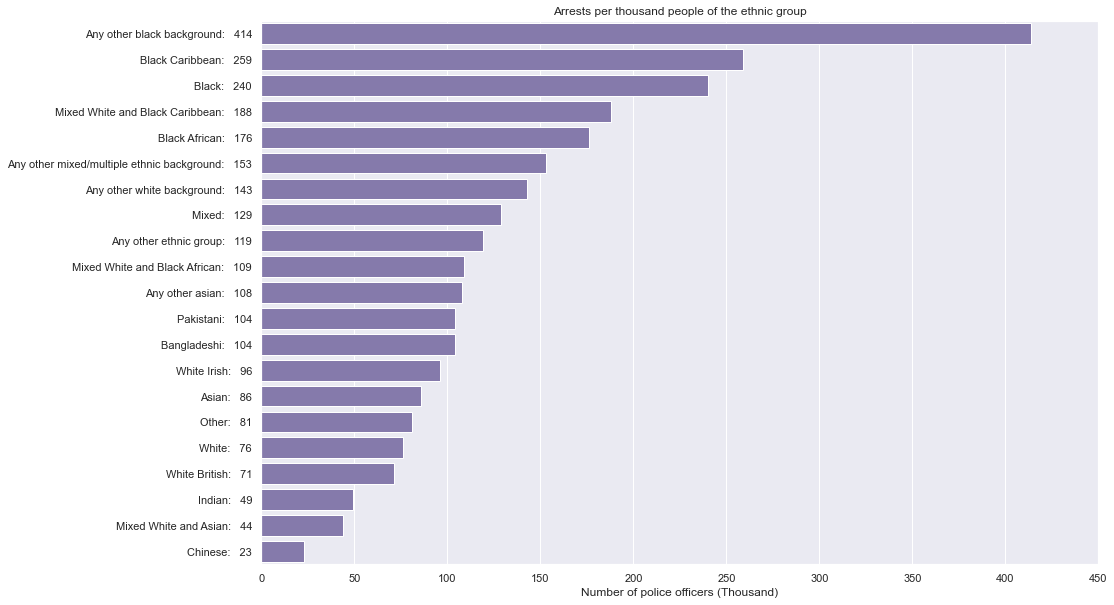

In [9]:
etnos_svod = etnos_svod.sort_values(by=['per'], ascending=False)
p = etnos_svod.drop(index = 5)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="per", y="pmr", data=p,
            label="", color="m")
ax.set(xlim=(0, 450), ylabel="",
       xlabel="Number of police officers (Thousand)")
ax.set_title('Arrests per thousand people of the ethnic group')

### <span style='font-family:Calibri'>   I live in a criminal area and I can say that the research results confirm my observations. But the question of what are the social reasons for criminal offence is open to me.To be honest, after this research I had more questions than answers. Therefore, I think to continue this research by supplementing it with more data. And I will also improve the code. I will post the result of further work in github. https://www.ons.gov.uk/ </span>